In [1]:
import sys
import subprocess
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seismic-library/')
import kaggle_support as kgs
import importlib
import seis_model
import numpy as np

/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
n_models: 1


Style_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


Style_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.15it/s]


False True
(4901, 1073)
capturing graph
capturing graph
True True
(4901, 1073)
capturing graph
FlatVel_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.09it/s]


FlatVel_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.81it/s]


FlatFault_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.65it/s]


FlatFault_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.02it/s]


CurveVel_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.13it/s]


CurveVel_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.03it/s]


CurveFault_B
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 19.98it/s]


CurveFault_A
too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


100%|██████████| 1/1 [00:00<00:00, 20.12it/s]


prior test 9.764424715292229e-14 1.679685575695089e-05
False False
(4901, 4901)
prior test 5.153425540527223e-06 10.306629495695233
prior test 1.123679396601053e-13 1.4104176818463543e-05
Mismatch to hosts: 3.5444538831673834e-05
adjoint 1.0469327228063152e-17 4.904263242783745e-05
diff 1.5727204184213184e-13 1.6588860071825717e-07
Mismatch to hosts: 1.5741465383079042e-05
adjoint 7.806255641895632e-18 0.0001352831488805375
diff 1.1763480308715764e-13 1.4481413610833205e-07
8.23042934313816e-16 1.0896616942090986e-11
All tests passed!


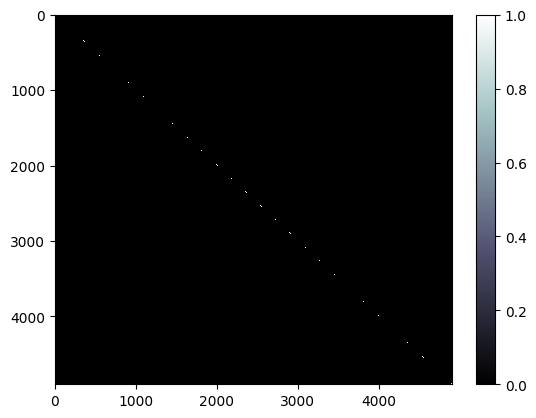

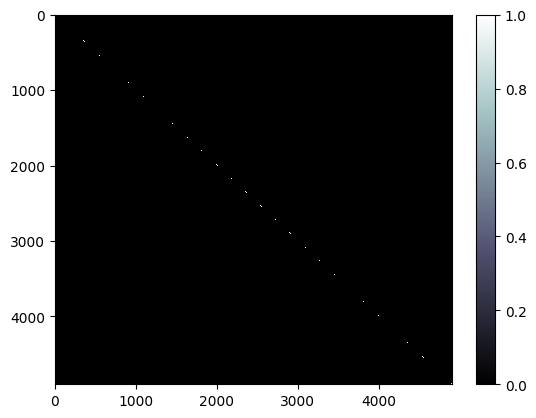

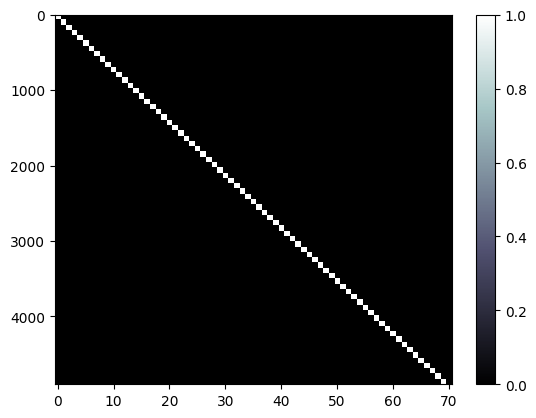

In [2]:
import seis_test
seis_test.run_all_tests()

In [3]:
# Download cache
#kgs.download_cache()

In [4]:
# Set up model
importlib.reload(seis_model)
model = seis_model.default_model()
model.models[1].run_in_parallel = True

too low
only doing style A in test mode
styleB not active yet
False False
(4901, 4901)


In [5]:
# Check model accuracy
seis_model.check_model_accuracy(model, 100)

100%|██████████| 4/4 [00:00<00:00,  5.69it/s]


Clearing pytorch


Processing in parallel:   0%|          | 0/50 [00:00<?, ?it/s]

CUDA_VISIBLE_DEVICES= 7
CUDA_VISIBLE_DEVICES= 3
CUDA_VISIBLE_DEVICES= 1
CUDA_VISIBLE_DEVICES= 2
CUDA_VISIBLE_DEVICES= 0
CUDA_VISIBLE_DEVICES= 5
CUDA_VISIBLE_DEVICES= 4
CUDA_VISIBLE_DEVICES= 6
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
n_models: 1
n_mo

Processing in parallel:   2%|▏         | 1/50 [00:34<28:23, 34.76s/it]

capturing graph
capturing graph
capturing graph
capturing graph
capturing graph
capturing graph


Processing in parallel: 100%|██████████| 50/50 [01:23<00:00,  1.66s/it]


         family      score
0  CurveFault_A   3.081620
1  CurveFault_B  88.894980
2    CurveVel_A   9.568612
3    CurveVel_B  32.729388
4   FlatFault_A   2.299491
5   FlatFault_B  41.729061
6     FlatVel_A   0.031429
7     FlatVel_B   0.005714
8       Style_A  27.293992
9       Style_B  49.797310
Combined:  25.543159672452965


In [6]:
# Full run
kgs.disable_caching = False
step = 5000
for ii in np.arange(0,len(kgs.load_all_test_data()),step):
    print(ii)
    data_out = model.infer(kgs.load_all_test_data()[ii:ii+step]
    # kgs.write_submission_file(data_out)
    # kgs.upload_cache()

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000


In [ ]:
# Upload cache
#kgs.upload_cache()